In [26]:
!pip install wordcloud

     ------------------------------------ 300.6/300.6 kB 208.7 kB/s eta 0:00:00


# Introduction to Natural Language Processing

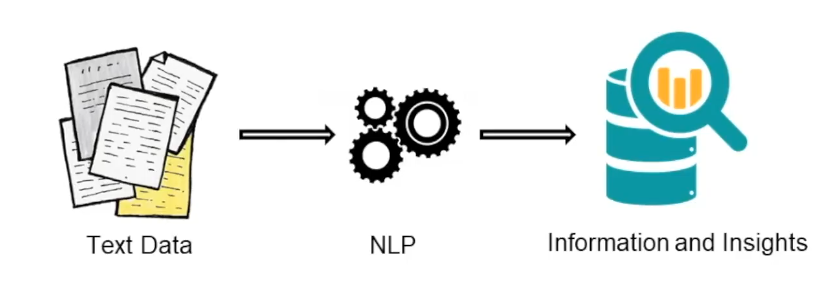



### RegEx
Simply put, regular expression or regex is a sequence of character(s) mainly used to find and replace patterns in a string or file. Hence, they are pretty handy in NLP tasks.<br>
Some of the common uses of regular expressions are:<br>
1) Search a string<br>2) Finding a string<br>3) Replace part of a string<br>


In [1]:
import re

In [2]:
string = "tiger is the national animal of India"
p1 = "tiger"
p2 = "lion"

In [7]:
# Search in starting

mo = re.match(p1,string)
print(mo)

<re.Match object; span=(0, 5), match='tiger'>


In [6]:
mo = re.match(p2,string)
print(mo)

None


In [10]:
# Searvch in b/w
p3 = "national"

mo = re.search(p3, string)
print(mo)
print(mo.group(0))

<re.Match object; span=(13, 21), match='national'>
national


In [11]:
# Multiple occurance of word

string = "tiger is the national animal of India and national sports is hockey"
p1 = "national"

In [13]:
mo = re.findall(p1, string)
print(mo)

['national', 'national']


In [17]:
#where present
mo = re.finditer(p1, string)

for m in mo:
    print(m)
    print(m.start())

<re.Match object; span=(13, 21), match='national'>
13
<re.Match object; span=(42, 50), match='national'>
42


In [20]:
# Date pattern

string = "Ron was born on 12-09-1992 and was admitted to the school on 15-12-1999"
p = "\d{2}-\d{2}-\d{4}"

In [21]:
mo = re.findall(p, string)
print(mo)

['12-09-1992', '15-12-1999']


In [22]:
# Replace

print(re.sub(p,"Monday", string))

Ron was born on Monday and was admitted to the school on Monday


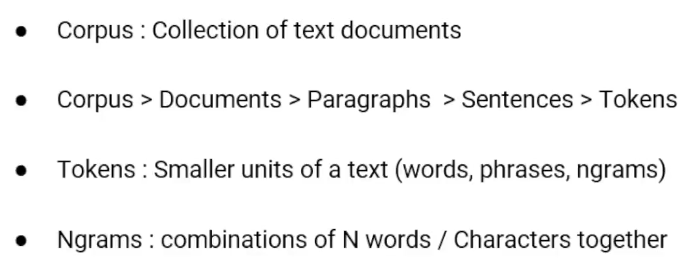<br><br>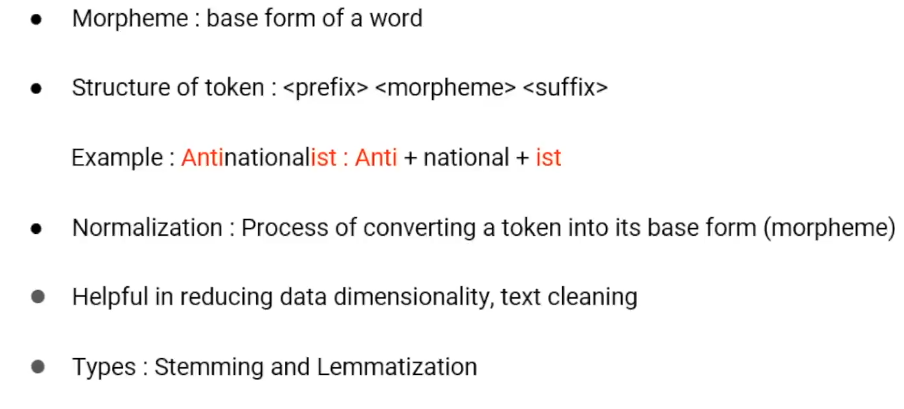<br><br>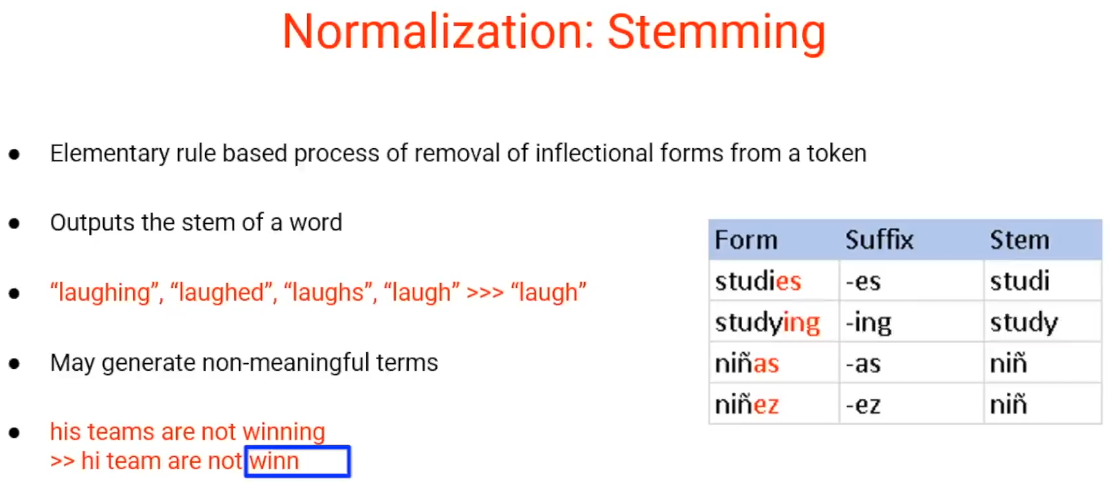<br><br>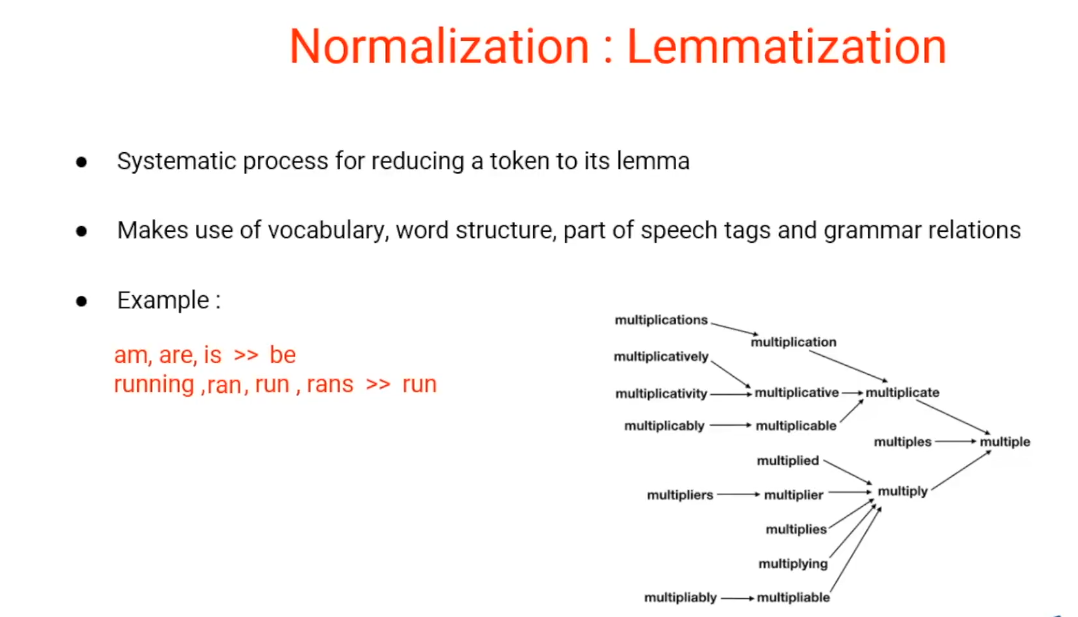<br><br>

## Exploring Text Data

Working with text is generally more challenging than working with numerical data. Hence, any kind of technique that helps in generating an intuition of the existing dataset is welcome. One of the simplest approach to understand any text document or to compare multiple documents can be to compute a frequency table of individual words present in the document/documents and use it to conduct further experiements like: finding top words per document, finding top common words among documents etc.

In our case, we have taken the challenge of Analyzing Sentiments from Twitter data, so we will focus on how to generate word frequencies and use it to create **Word Clouds** in Python that will help us get a better overall understanding of the dataset.

**Note:-** We are using the same dataset from `tweets.csv` that we used earlier. You can get it [here.](https://studio.trainings.analyticsvidhya.com/assets/courseware/v1/aa0ae6514e0be95f11be85b84d4fd6d2/asset-v1:AnalyticsVidhya+NLP101+2018_T1+type@asset+block/tweets.csv)

### Table of Contents
1. About the Dataset
2. Generating Word Frequency
3. EDA using Word Clouds
4. Why to Preprocess text data?
5. Challenge

### 1. About the Dataset

The dataset that we are going to use is the same dataset of tweets from Twitter that will be used in module 8 for **Social Media Information Extraction**. You can download it from [here.](https://studio.trainings.analyticsvidhya.com/assets/courseware/v1/aa0ae6514e0be95f11be85b84d4fd6d2/asset-v1:AnalyticsVidhya+NLP101+2018_T1+type@asset+block/tweets.csv)
Let's load the dataset using pandas and have a quick look at some sample tweets. 

In [23]:
#Load the dataset
import pandas as pd 
dataset = pd.read_csv('tweets.csv', encoding = 'ISO-8859-1')

dataset.head()

,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
0,1,1,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,2016-11-23 18:40:30,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False
1,2,2,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,2016-11-23 18:40:29,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False
2,3,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,2016-11-23 18:40:03,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False
3,4,4,RT @ANI_news: Gurugram (Haryana): Post office ...,False,0,NaN,2016-11-23 18:39:59,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338,True,False
4,5,5,RT @satishacharya: Reddy Wedding! @mail_today ...,False,0,NaN,2016-11-23 18:39:39,False,NaN,8.014954e+17,NaN,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120,True,False


As can be seen above, **text** column is of interest to us as it contains the tweet. At this point, you don't have to worry about other columns as that will be handled in future modules. Let's go ahead and inspect some of the tweets.

### 2. Generating Word Frequency

Let's first generate a frequency table of all the words present in all the tweets combined.

In [29]:
def gen_freq(text):
    #Will store the list of words
    word_list = []

    #Loop over all the tweets and extract words into word_list
    for tw_words in text.split():
        word_list.extend(tw_words)

    #Create word frequencies using word_list
    word_freq = pd.Series(word_list).value_counts()

    #Print top 20 words
    word_freq[:20]
    
    return word_freq

word_freq = gen_freq(dataset.text.str)

### 3. EDA using Word Clouds

Now that you have succesfully created a frequency table, you can use that to create multiple **visualizations** in the form of word clouds. Sometimes, the quickest way to understand the context of the text data is using a word cloud of top 100-200 words. Let's see how to create that in Python.

**Note:-** You'll use the `WordCloud` library of Python. You can install it by - 

`pip install wordcloud`

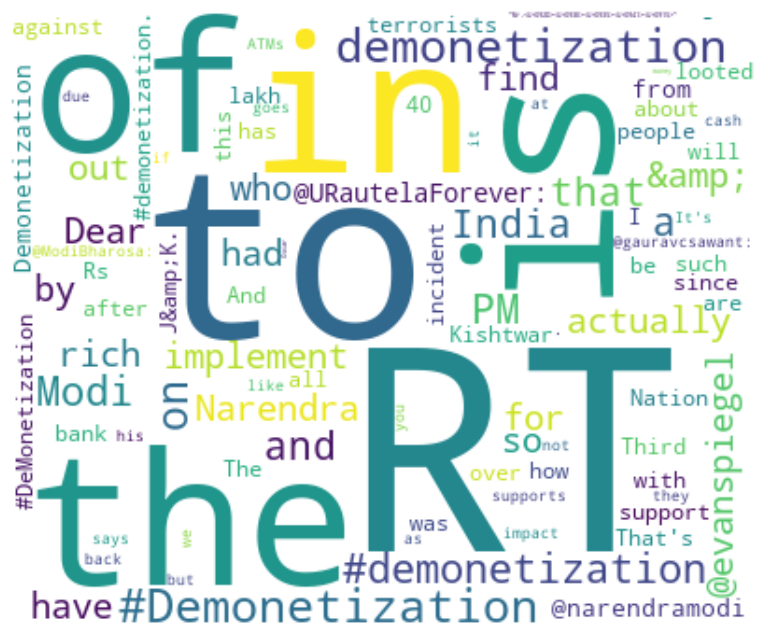

In [30]:
#Import libraries
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#Generate word cloud
wc = WordCloud(width=400, height=330, max_words=100, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

**Few things to Note:-**

1. There is noise in the form of "RT" and "&amp" which can be removed from the word frequency.
2. Stop words like "the", "in", "to", "of" etc. are obviously ranking among the top frequency words but these are just constructs of the English language and are not specific to the people's tweets.
3. Words like "demonetization" have occured multiple times. The reason for this is that the current text is not **Normalized** so words like "demonetization", "Demonetization" etc. are all considered as different words.

The above are some of the problems that we need to address in order to make better visualization. Let's solve some of the problems!

#### Text Cleaning

You have already learnt how to utilize Regex to do text cleaning, that is precisely what we are doing here.

In [31]:
import re

def clean_text(text):
    #Remove RT
    text = re.sub(r'RT', '', text)
    
    #Fix &
    text = re.sub(r'&amp;', '&', text)
    
    #Remove punctuations
    text = re.sub(r'[?!.;:,#@-]', '', text)

    #Convert to lowercase to maintain consistency
    text = text.lower()
    return text

The above will solve problems related to RT, &amp and also the problem of counting same word twice due to case difference. Yet we can do better, let's remove the common stop words.

#### Stop words Removal
WordCloud provides its own stopwords list. You can have a look at it by- 


In [32]:
#Import list of stopwards
from wordcloud import STOPWORDS

print(STOPWORDS)

{'him', 'how', 'therefore', "wasn't", 'can', 'which', "we'll", 'should', 'www', 'yours', 'about', 'however', 'have', 'com', 'in', 'through', 'whom', 'them', 'once', 'ever', "she'll", "when's", 'get', "we've", 'before', 'from', 'hence', 'could', "how's", 'just', 'ours', 'would', 'against', "let's", 'their', 'else', 'otherwise', "shan't", 'they', "who's", "wouldn't", 'been', 'up', 'most', 'down', 'so', 'such', 'if', 'having', 'out', 'why', "i'd", "shouldn't", "we'd", "he'd", "where's", 'who', 'my', 'to', 'of', 'am', 'were', 'theirs', 'yourself', 'yourselves', "haven't", "mustn't", 'also', "that's", 'but', 'himself', 'when', 'where', 'on', 'those', 'these', 'shall', "hadn't", 'very', 'i', 'had', 'off', 'since', "won't", "you're", "didn't", 'there', 'some', 'again', "i'll", 'all', "doesn't", 'r', "she'd", 'between', "they've", 'not', 'she', 'myself', 'other', "weren't", 'doing', 'that', "hasn't", "why's", 'because', 'by', 'he', 'than', 'did', 'own', "he'll", "you'll", 'more', 'themselves',

Now that you know what all has to be changed to improve our word cloud, let's make some wordclouds. We'll call the previous functions of `clean_text()` and `gen_freq()` to perform cleaning and frequency computation operation respectively and drop the words present in `STOPWORDS` from the `word_freq` dictionary.

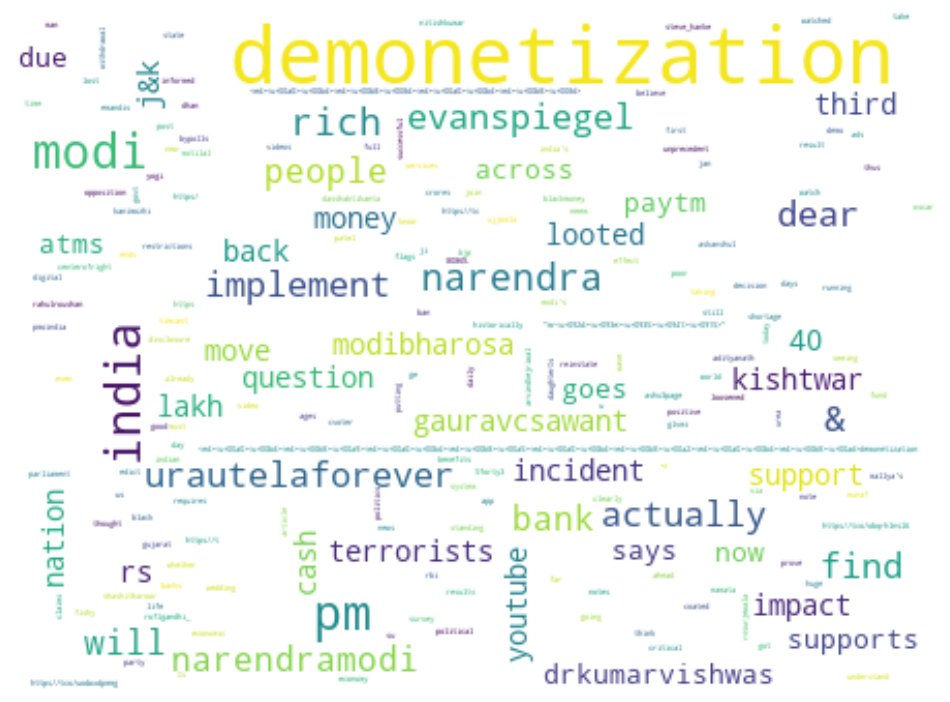

In [33]:
text = dataset.text.apply(lambda x: clean_text(x))
word_freq = gen_freq(text.str)*100
word_freq = word_freq.drop(labels=STOPWORDS, errors='ignore')

#Generate word cloud
wc = WordCloud(width=450, height=330, max_words=200, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 14))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Now that you have succesfully created a wordcloud, you can get some insight into the areas of interest of the general twitter users:

 - It is evident that people are talking about govt. policies like **demonetization**, **J&K**. 
 - There are some personalitites that are mentioned numerous times like **evanspiegel**, **PM Narendra Modi**, **Dr Kumar Vishwas** etc.
 - There are also talks about **oscars**, **youtube** and **terrorists**
 - There are many sub-topics that revolve around demonetization like **atms**, **bank**, **cash**, **paytm** etc. Which tells that many people are concerned about it.
 
### 4. Why to Preprocess text data?

As you may have already seen that without performing preprocessing operations like cleaning, removing stopwords and changing case in the dataset the representation always comes out wrong. In this case, it was that the wordcloud was full of noise but in other cases it might be your Machine Learning model that is going to suffer.

Also something to note is even now some words are misreperesented for example: **modi**, **narendra** and **narendramodi** all refer to the same person. This can eaisly be solved by **Normalizing** our text which is a technique that you'll learn in future models.

### 5. Challenge

As you would have noticed, even the current word cloud has some form of noise especially from strange symbols like `<U...>`. It's your task to go ahead and figure out how to deal with the, given the fact that they are present in word cloud implies that noise is widely present in the data.

In [ ]:
#Your Code Here

# token, stem, lemmetize, pos

In [42]:
list(word_freq.index) 
#&, urautelaforever, '<ed><u+00a0><u+00bd><ed><u+00b8><u+00a9><ed><u+00a0><u+00bd><ed><u+00b8><u+00a5><ed><u+00a0><u+00bd><ed><u+00b8><u+00a2><ed><u+00a0><u+00bd><ed><u+00b8><u+00ad>demonetization',
# '"mr<u+092d><u+093e><u+0935><u+0941><u+0915>"', https//tco/obqrhlnsl6, https//t, '\x92s','8086%','https//tco/uodwxdpmmg',

['demonetization',
 'india',
 'modi',
 'pm',
 'narendra',
 'rich',
 'find',
 'dear',
 'implement',
 'evanspiegel',
 'actually',
 '&',
 'urautelaforever',
 'narendramodi',
 'people',
 'bank',
 'will',
 'rs',
 'impact',
 'lakh',
 'support',
 'cash',
 'terrorists',
 'youtube',
 'j&k',
 'nation',
 'third',
 'looted',
 'incident',
 'kishtwar',
 'move',
 'modibharosa',
 '40',
 'gauravcsawant',
 'question',
 'money',
 'back',
 'across',
 'atms',
 'now',
 'says',
 'due',
 'supports',
 'goes',
 'paytm',
 'drkumarvishwas',
 '<ed><u+00a0><u+00bd><ed><u+00b8><u+00a9><ed><u+00a0><u+00bd><ed><u+00b8><u+00a5><ed><u+00a0><u+00bd><ed><u+00b8><u+00a2><ed><u+00a0><u+00bd><ed><u+00b8><u+00ad>demonetization',
 '"mr<u+092d><u+093e><u+0935><u+0941><u+0915>"',
 'oscar',
 'https//tco/obqrhlnsl6',
 'app',
 'whether',
 'still',
 'good',
 'govt',
 "modi's",
 'notes',
 'full',
 'bjp',
 'https//t',
 'poor',
 'shortage',
 'party',
 'clearly',
 'critical',
 'rssurjewala',
 'bypolls',
 'informed',
 'edict',
 '5forty3'

## Build a Basic ML Model for Text Classification

 - In this notebook, you'll learn how to implement a text classification task using machine learning. 
 - You'll learn to create basic NLP based features that can be created from the text and you'll then test the model on the test data set to evaluate it's performance.
 
To make things interesting, the task is to build a machine learning model to **classify** whether a particular tweet is **hate speech** or **not**. I'll explain more as you proceed further, so let's start without much ado!
 
### Table of Contents

1. About the Dataset
2. Text Cleaning
3. Feature Engineering 
4. Train an ML model for Text Classification
5. Evaluate the ML model 
6. Conclusion

### 1. About the Dataset

The dataset that you are going to use is of **Detecting Hate Speech** in people's tweets. You can download it from [here.](http://trainings.analyticsvidhya.com/asset-v1:AnalyticsVidhya+NLP101+2018_T1+type@asset+block@final_dataset_basicmlmodel.csv)
Let's load the dataset using pandas and have a quick look at some sample tweets. 


In [1]:
#Load the dataset
import pandas as pd

dataset = pd.read_csv('final_dataset_basicmlmodel.csv')
dataset.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


**Things to note**
 - **label** is the column that contains the target variable or the value that has to be predicted. 1 means it's a hate speech and 0 means it is not.
 - **tweet** is the column that contains the text of the tweet. This is the main data on which NLP techniques will be applied.
 
Let's have a close look at some of the tweets.

In [2]:
for index, tweet in enumerate(dataset["tweet"][10:15]):
    print(index+1,".",tweet)

1 .  â #ireland consumer price index (mom) climbed from previous 0.2% to 0.5% in may   #blog #silver #gold #forex
2 . we are so selfish. #orlando #standwithorlando #pulseshooting #orlandoshooting #biggerproblems #selfish #heabreaking   #values #love #
3 . i get to see my daddy today!!   #80days #gettingfed
4 . ouch...junior is angryð#got7 #junior #yugyoem   #omg 
5 . i am thankful for having a paner. #thankful #positive     


**Note :- Noise present in Tweets**

 - If you look closely, you'll see that there are many hashtags present in the tweets of the form `#` symbol followed by text. We particularly don't need the `#` symbol so we will clean it out.
 - Also, there are strange symbols like `â` and `ð` in tweet 4. This is actually `unicode` characters that is present in our dataset that we need to get rid of because they don't particularly add anything meaningful.
 - There are also numerals and percentages .

### 2. Data Cleaning

Let's clean up the noise in our dataset.

In [3]:
import re

#Clean text from noise
def clean_text(text):
    #Filter to allow only alphabets
    text = re.sub(r'[^a-zA-Z\']', ' ', text)
    
    #Remove Unicode characters
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    
    #Convert to lowercase to maintain consistency
    text = text.lower()
       
    return text

In [4]:
dataset['clean_text'] = dataset.tweet.apply(lambda x: clean_text(x))

### 3. Feature Engineering

 - Feature engineering is the science (and art) of extracting more information from existing data. You are not adding any new data here, but you are actually making the data you already have more useful. 
 - The machine learning model does not understand text directly, **so we create numerical features that reperesant the  underlying text**.
 - In this module, you'll deal with very basic NLP based features and as you progress further in the course you'll come across more complex and efficient ways of doing the same.

In [5]:
#Exhaustive list of stopwords in the english language. We want to focus less on these so at some point will have to filter
STOP_WORDS = ['a', 'about', 'above', 'after', 'again', 'against', 'all', 'also', 'am', 'an', 'and',
              'any', 'are', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below',
              'between', 'both', 'but', 'by', 'can', "can't", 'cannot', 'com', 'could', "couldn't", 'did',
              "didn't", 'do', 'does', "doesn't", 'doing', "don't", 'down', 'during', 'each', 'else', 'ever',
              'few', 'for', 'from', 'further', 'get', 'had', "hadn't", 'has', "hasn't", 'have', "haven't", 'having',
              'he', "he'd", "he'll", "he's", 'her', 'here', "here's", 'hers', 'herself', 'him', 'himself', 'his', 'how',
              "how's", 'however', 'http', 'i', "i'd", "i'll", "i'm", "i've", 'if', 'in', 'into', 'is', "isn't", 'it',
              "it's", 'its', 'itself', 'just', 'k', "let's", 'like', 'me', 'more', 'most', "mustn't", 'my', 'myself',
              'no', 'nor', 'not', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'otherwise', 'ought', 'our', 'ours',
              'ourselves', 'out', 'over', 'own', 'r', 'same', 'shall', "shan't", 'she', "she'd", "she'll", "she's",
              'should', "shouldn't", 'since', 'so', 'some', 'such', 'than', 'that', "that's", 'the', 'their', 'theirs',
              'them', 'themselves', 'then', 'there', "there's", 'these', 'they', "they'd", "they'll", "they're",
              "they've", 'this', 'those', 'through', 'to', 'too', 'under', 'until', 'up', 'very', 'was', "wasn't",
              'we', "we'd", "we'll", "we're", "we've", 'were', "weren't", 'what', "what's", 'when', "when's", 'where',
              "where's", 'which', 'while', 'who', "who's", 'whom', 'why', "why's", 'with', "won't", 'would', "wouldn't",
              'www', 'you', "you'd", "you'll", "you're", "you've", 'your', 'yours', 'yourself', 'yourselves']

#Generate word frequency
def gen_freq(text):
    #Will store the list of words
    word_list = []

    #Loop over all the tweets and extract words into word_list
    for tw_words in text.split():
        word_list.extend(tw_words)

    #Create word frequencies using word_list
    word_freq = pd.Series(word_list).value_counts()
    
    #Drop the stopwords during the frequency calculation
    word_freq = word_freq.drop(STOP_WORDS, errors='ignore')
    
    return word_freq

#Check whether a negation term is present in the text
def any_neg(words):
    for word in words:
        if word in ['n', 'no', 'non', 'not'] or re.search(r"\wn't", word):
            return 1
    else:
        return 0

#Check whether one of the 100 rare words is present in the text
def any_rare(words, rare_100):
    for word in words:
        if word in rare_100:
            return 1
    else:
        return 0

#Check whether prompt words are present
def is_question(words):
    for word in words:
        if word in ['when', 'what', 'how', 'why', 'who']:
            return 1
    else:
        return 0

In [6]:
word_freq = gen_freq(dataset.clean_text.str)
#100 most rare words in the dataset
rare_100 = word_freq[-100:]
#Number of words in a tweet
dataset['word_count'] = dataset.clean_text.str.split().apply(lambda x: len(x))
#Negation present or not
dataset['any_neg'] = dataset.clean_text.str.split().apply(lambda x: any_neg(x))
#Prompt present or not
dataset['is_question'] = dataset.clean_text.str.split().apply(lambda x: is_question(x))
#Any of the most 100 rare words present or not
dataset['any_rare'] = dataset.clean_text.str.split().apply(lambda x: any_rare(x, rare_100))
#Character count of the tweet
dataset['char_count'] = dataset.clean_text.apply(lambda x: len(x))

In [7]:
#Top 10 common words are
gen_freq(dataset.clean_text.str)[:10]

user      3351
amp        439
love       320
day        254
trump      214
happy      207
will       191
people     186
new        171
u          158
dtype: int64

In [8]:
dataset.head()

,id,label,tweet,clean_text,word_count,any_neg,is_question,any_rare,char_count
0,1,0,@user when a father is dysfunctional and is s...,user when a father is dysfunctional and is s...,18,0,1,1,102
1,2,0,@user @user thanks for #lyft credit i can't us...,user user thanks for lyft credit i can't us...,19,1,0,0,122
2,3,0,bihday your majesty,bihday your majesty,3,0,0,0,21
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in ...,12,0,0,0,86
4,5,0,factsguide: society now #motivation,factsguide society now motivation,4,0,0,0,39


### Splitting the dataset into Train-Test split

 - The dataset is split into train and test sets so that we can evaluate our model's performance on unseen data.
 - The model will only be trained on the `train` set and will make predictions on the `test` set whose data points the model has never seen. This will make sure that we have a proper way to test the model.
 
This is a pretty regular practice in Machine Learning, don't worry if you are confused. It's just a way of testing your model's performance on unseen data.

In [13]:
from sklearn.model_selection import train_test_split

X = dataset[['word_count', 'any_neg', 'any_rare', 'char_count', 'is_question']]
y = dataset.label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=27)

### 4. Train an ML model for Text Classification

Now that the dataset is ready, it is time to train a Machine Learning model on the same. You will be using a **Naive Bayes** classifier from `sklearn` which is a prominent python library used for machine learning.

In [14]:
from sklearn.naive_bayes import GaussianNB

#Initialize GaussianNB classifier
model = GaussianNB()
#Fit the model on the train dataset
model = model.fit(X_train, y_train)
#Make predictions on the test dataset
pred = model.predict(X_test)

### 5. Evaluate the ML model

It is time to train the model on previously unseen data: **X_test** and **y_test** sets that you previously created. Let's check the accuracy of the model.

In [16]:
from sklearn.metrics import accuracy_score

print("Accuracy:", accuracy_score(y_test, pred)*100, "%")

Accuracy: 60.57142857142858 %


### 6. Conclusion

**Note:** that since we have used very basic NLP features, the classification accuracy and f1 scores aren't that impressive. The goal of this exercise was to make you familiar with the model building process and I hope that you have a better idea on how to build a text classification model.